In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score


In [164]:
data_mem = pd.read_csv("mem_data.csv", delim_whitespace=" , ")
data_lin = pd.read_csv("linear_data.csv", delim_whitespace=" , ")

x_vals = np.arange(start=10, stop=(1 * 10_00), step=10)
x_vals_lin = np.arange(start=0, stop=100, step=1)

malloc_y = data_mem["malloc"]
pooling_y = data_mem["pooling"]

frag_at_y = data_lin["frag_at"]
defrag_seq_y = data_lin["defrag_seq_at"]
defrag_at_y = data_lin["defrag_at"]

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199


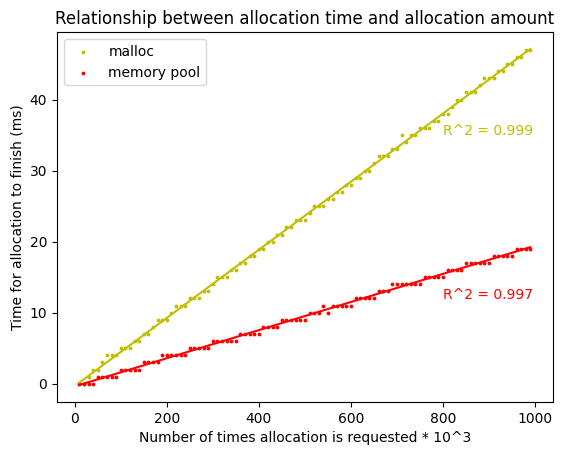

In [176]:
# figure 2.2
plt.title("Relationship between allocation time and allocation amount")
plt.xlabel("Number of times allocation is requested * 10^3")
plt.ylabel("Time for allocation to finish (ms)")

reg_malloc = np.polyfit(x_vals, malloc_y, 1)
reg_pool = np.polyfit(x_vals, pooling_y, 1)
r2_malloc = round( r2_score(malloc_y, reg_malloc[0] * x_vals + reg_malloc[1]), 3)
r2_pool = round( r2_score(pooling_y, reg_pool[0] * x_vals + reg_pool[1]), 3)


plt.scatter(x_vals, malloc_y, color='y', s=3)
plt.scatter(x_vals, pooling_y, color='r', s=3)
plt.plot(x_vals, reg_malloc[0] * x_vals + reg_malloc[1], color='y')
plt.plot(x_vals, reg_pool[0] * x_vals + reg_pool[1], color='r')

plt.text(x_vals[int(len(x_vals) * .8)], malloc_y[int(len(malloc_y) * .8)] - 3, f"R^2 = {r2_malloc}", dict(color='y'))
plt.text(x_vals[int(len(x_vals) * .8)], pooling_y[int(len(pooling_y) * .8)] - 3, f"R^2 = {r2_pool}", dict(color='r'))

plt.legend(['malloc', 'memory pool'])

[3.90467447e+01 1.25775259e+06]
0.022
<class 'numpy.ndarray'>
-------
<class 'pandas.core.series.Series'>
[[1.         0.95831277]
 [0.95831277 1.        ]]


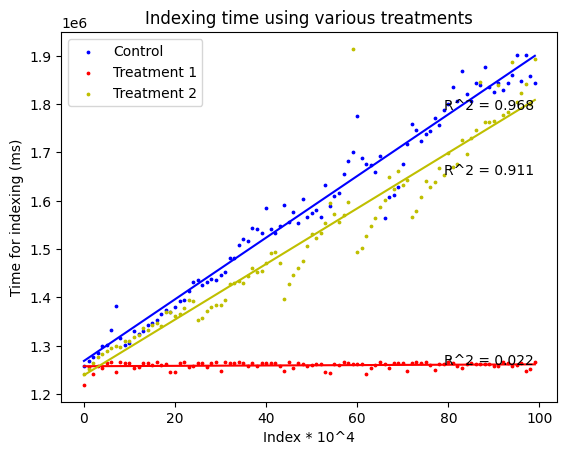

In [175]:
#figure 3.1

plt.title("Indexing time using various treatments")
plt.xlabel("Index * 10^4")
plt.ylabel("Time for indexing (ms)")

reg_f_at = np.polyfit(x_vals_lin, frag_at_y, 1)
reg_df_sq = np.polyfit(x_vals_lin, defrag_seq_y, 1)
reg_df_at = np.polyfit(x_vals_lin, defrag_at_y, 1)

print(reg_df_sq)


r2_f_at = round( r2_score(reg_f_at[0] * x_vals_lin + reg_f_at[1], frag_at_y), 3)
r2_df_at = round( r2_score(reg_df_at[0] * x_vals_lin + reg_df_at[1], defrag_at_y), 3)
r2_df_sq = round( np.corrcoef(x_vals_lin, defrag_seq_y)[0][1]**2, 3)

plt.scatter(x_vals_lin, frag_at_y, c='b', s=3)
plt.scatter(x_vals_lin, defrag_seq_y, c='r', s=3)
plt.scatter(x_vals_lin, defrag_at_y, c='y', s=3)

plt.plot(x_vals_lin, reg_f_at[0] * x_vals_lin + reg_f_at[1], color='b')
plt.plot(x_vals_lin, reg_df_sq[0] * x_vals_lin + reg_df_sq[1], color='r')
plt.plot(x_vals_lin, reg_df_at[0] * x_vals_lin + reg_df_at[1], color='y')

plt.text(x_vals_lin[int(len(x_vals) * .8)], frag_at_y[int(len(malloc_y) * .8)], f"R^2 = {r2_f_at}", dict(color='black'))
plt.text(x_vals_lin[int(len(x_vals) * .8)], defrag_seq_y[int(len(pooling_y) * .8)], f"R^2 = {r2_df_sq}", dict(color='black'))
plt.text(x_vals_lin[int(len(x_vals) * .8)], defrag_at_y[int(len(malloc_y) * .8)], f"R^2 = {r2_df_at}", dict(color='black'))

plt.legend(["Control", "Treatment 1", "Treatment 2"])

